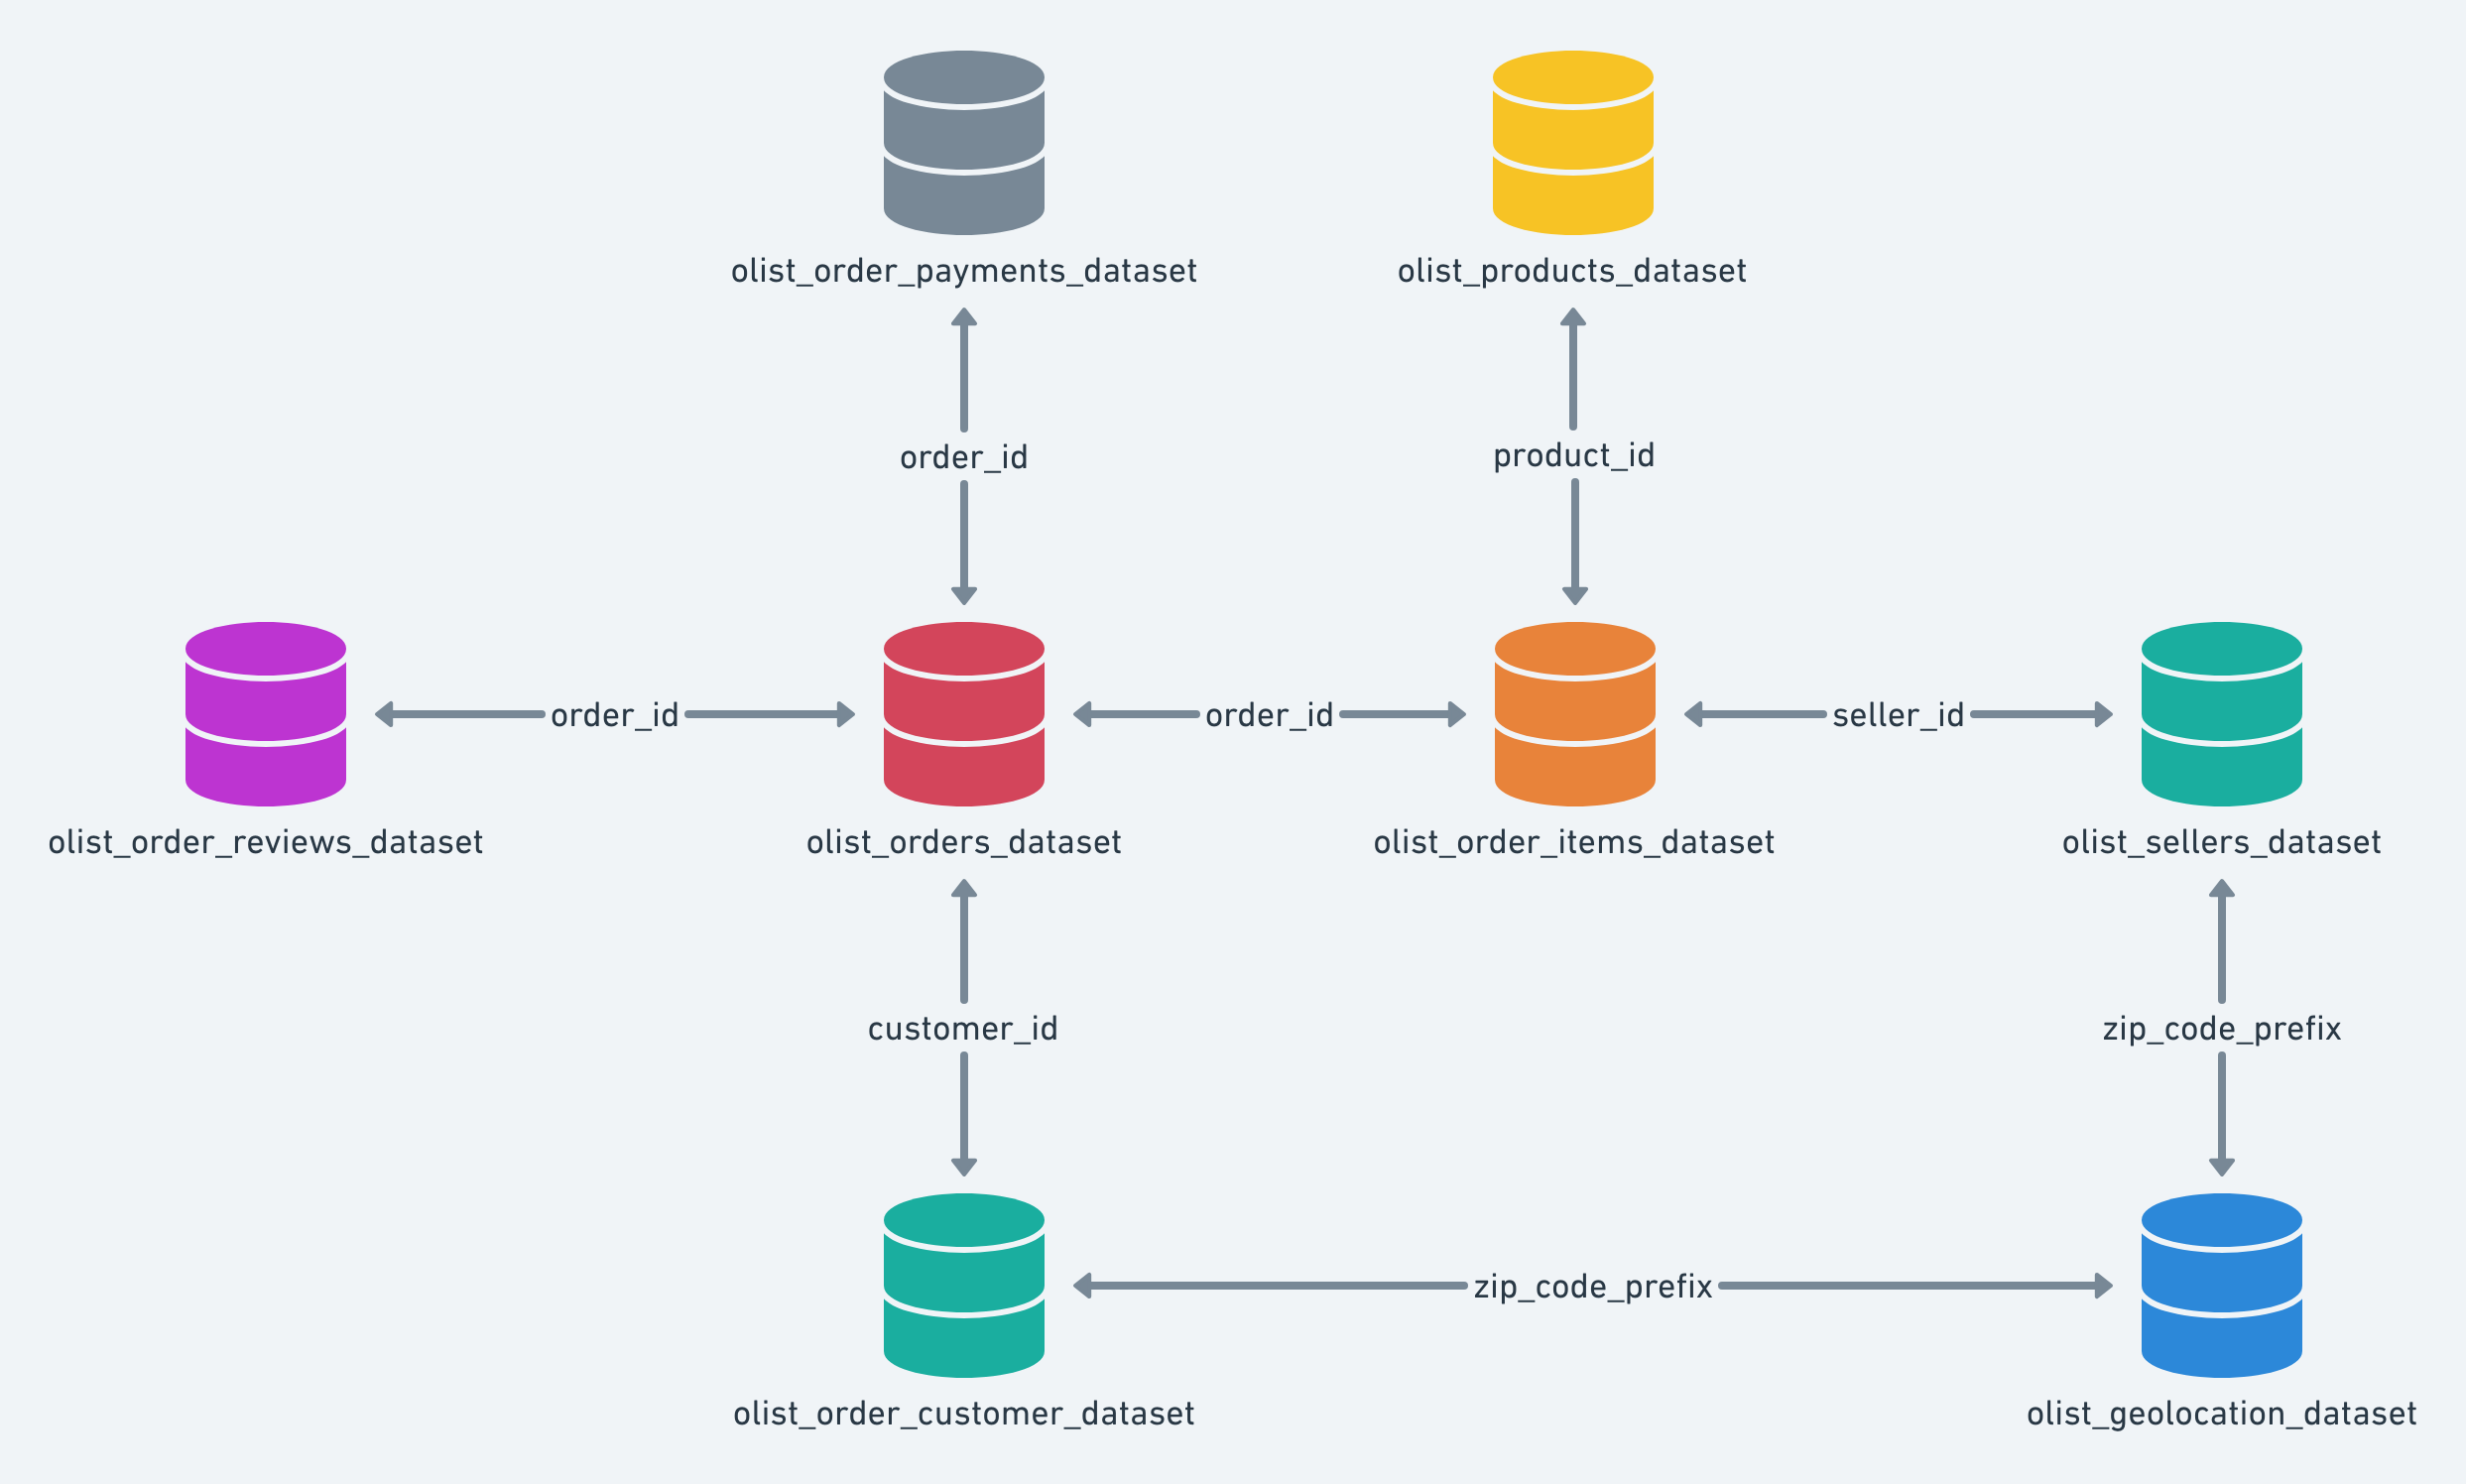

In [2]:
import pandas as pd
import numpy as np

In [8]:
from zipfile import ZipFile, Path

## Reading the Tables

In [ ]:
LIST_OF_FILES = ['olist_customers_dataset.csv',
'olist_geolocation_dataset.csv',
'olist_order_items_dataset.csv',
'olist_order_payments_dataset.csv',
'olist_order_reviews_dataset.csv',
'olist_orders_dataset.csv',
'olist_products_dataset.csv',
'olist_sellers_dataset.csv',
'product_category_name_translation.csv']

In [21]:
# Each dataset is stored into a position, accessible by its name as key
dict_dataset = {}

# Read all files
with ZipFile("archive.zip") as myzip:
    for file_name in LIST_OF_FILES:
        with myzip.open(file_name) as file:
            dict_dataset[file_name.split('.')[0]] = pd.read_csv(file, header=0, delimiter=",")

In [34]:
pd.Series(dict_dataset.keys())

0              olist_customers_dataset
1            olist_geolocation_dataset
2            olist_order_items_dataset
3         olist_order_payments_dataset
4          olist_order_reviews_dataset
5                 olist_orders_dataset
6               olist_products_dataset
7                olist_sellers_dataset
8    product_category_name_translation
dtype: object

## Shows all columns and its origin Dataset

In [42]:
df_columns = pd.DataFrame(columns=['COL','ORIGIN'])

for d in dict_dataset:
    df_aux = pd.DataFrame()
    df_aux['COL'] = dict_dataset[d].columns
    df_aux['ORIGIN'] = d
    df_columns = pd.concat([df_columns, df_aux], axis=0)

In [43]:
df_columns.reset_index(inplace=True, drop=True)

In [45]:
df_columns

,COL,ORIGIN
0,customer_id,olist_customers_dataset
1,customer_unique_id,olist_customers_dataset
2,customer_zip_code_prefix,olist_customers_dataset
3,customer_city,olist_customers_dataset
4,customer_state,olist_customers_dataset
5,geolocation_zip_code_prefix,olist_geolocation_dataset
6,geolocation_lat,olist_geolocation_dataset
7,geolocation_lng,olist_geolocation_dataset
8,geolocation_city,olist_geolocation_dataset
9,geolocation_state,olist_geolocation_dataset


13664.08

In [66]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(rc={'axes.facecolor':'white'}) #para dark mode no vscode

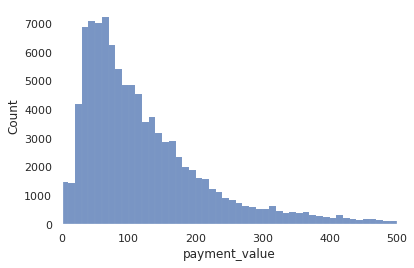

In [86]:
plt1 = sns.histplot(data=dict_dataset['olist_order_payments_dataset'].payment_value, bins=800, binwidth=10);
plt1.set(xlim=(0, 500));

In [94]:
quartiles = np.quantile(dict_dataset['olist_order_payments_dataset'].payment_value, q=[0.25, 0.5, 0.75])

In [96]:
Q1 = quartiles[0]
Q2 = quartiles[1]
Q3 = quartiles[2]

In [100]:
IQR = Q3 - Q1

In [102]:
Q3 + 1.5 * IQR

344.40875000000005

## Analysing the Customers Dataset

### Number of occurencies per City

In [5]:
df.groupby('customer_city').size().rename('Quantity').reset_index().sort_values('Quantity', ascending=False).head(10)

,customer_city,Quantity
3597,sao paulo,15540
3155,rio de janeiro,6882
453,belo horizonte,2773
558,brasilia,2131
1143,curitiba,1521
707,campinas,1444
2964,porto alegre,1379
3247,salvador,1245
1529,guarulhos,1189
3428,sao bernardo do campo,938


In [123]:
df_prods

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas
...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios


## Product Category Analysis

In [124]:
df_orders = dict_dataset['olist_order_items_dataset']

df_prods = dict_dataset['olist_products_dataset'][['product_id', 'product_category_name']]

In [126]:
df_order_prod_merged = df_orders.merge(df_prods, how='left', on='product_id')

In [133]:
df_order_prod_merged.product_category_name.value_counts().reset_index().head(30,)

,index,product_category_name
0,cama_mesa_banho,11115
1,beleza_saude,9670
2,esporte_lazer,8641
3,moveis_decoracao,8334
4,informatica_acessorios,7827
5,utilidades_domesticas,6964
6,relogios_presentes,5991
7,telefonia,4545
8,ferramentas_jardim,4347
9,automotivo,4235
